# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:



1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$


Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
where $W(t)\sim\mathcal{N}(0,t)$.
Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$


<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### Solution


The figures show the Monte Carlo estimates of European **call** and **put** option prices at time $ t = 0 $, using:

- **Direct sampling** of the final asset price $ S(T) $ from the analytical GBM distribution.
- **Discretized sampling** of the asset path over 100 time steps in $[0, T=1]$, using GBM.

Each method is applied to $ M = 10^5 $ simulated paths, divided into $ N = 100 $ blocks. Statistical uncertainties are estimated using the data blocking technique.


In [1]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


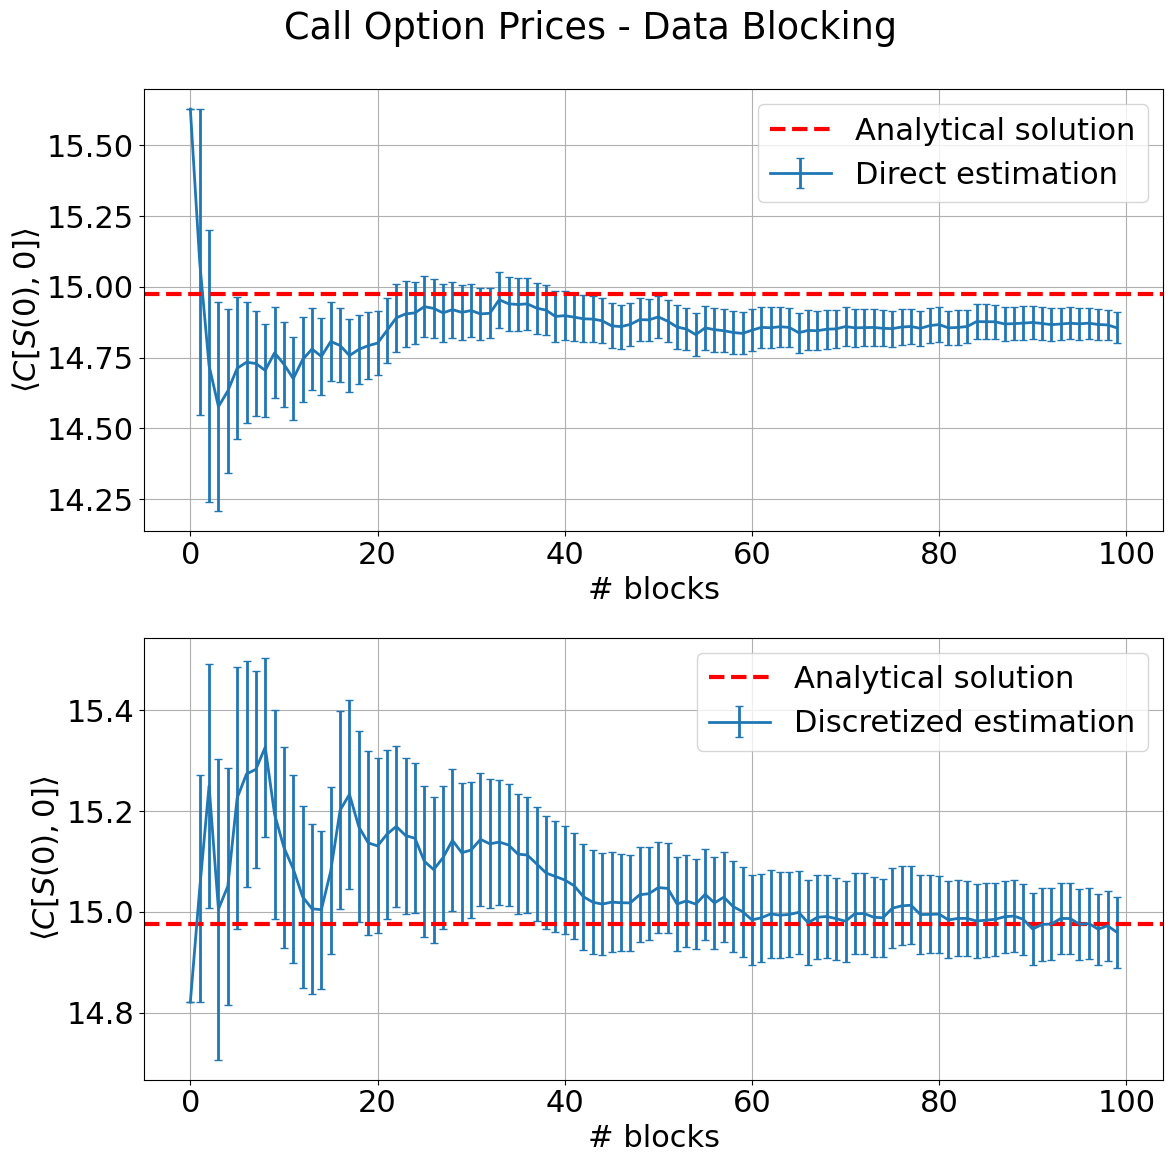

In [16]:
C_directly = np.loadtxt("es_03.1/output_C_directly.dat")
C_discretized = np.loadtxt("es_03.1/output_C_discretized.dat")

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Call Option Prices - Data Blocking ')

axs[0].errorbar(C_directly[:, 0]*1e-3, C_directly[:, 1], yerr=C_directly[:, 2],  capsize=3, lw=2, label='Direct estimation')
axs[0].axhline(y=call, color='r', linestyle='--', label='Analytical solution', lw=3)
axs[0].set_xlabel('# blocks')
axs[0].set_ylabel(r'$\langle C[S(0),0] \rangle$')
axs[0].legend()

axs[0].grid()
axs[1].errorbar(C_discretized[:, 0]*1e-3, C_discretized[:, 1], yerr=C_discretized[:, 2],  capsize=3, lw=2, label='Discretized estimation')
axs[1].axhline(y=call, color='r', linestyle='--', label='Analytical solution', lw =3)
axs[1].set_xlabel('# blocks')
axs[1].set_ylabel(r'$\langle C[S(0),0] \rangle$')
axs[1].legend()
axs[1].grid()

plt.tight_layout()


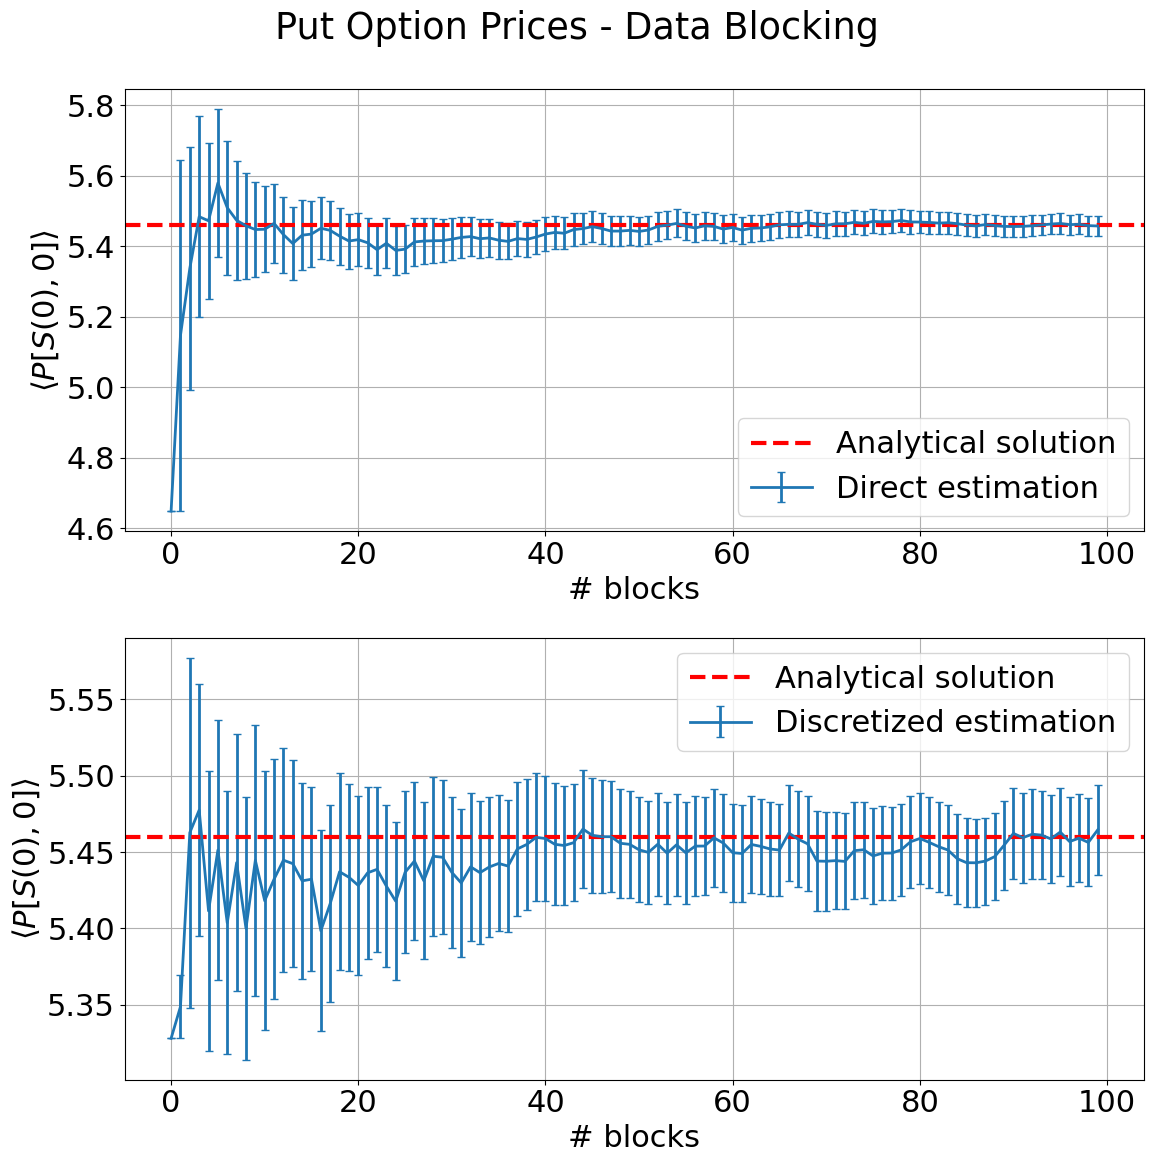

In [18]:
P_directly = np.loadtxt("es_03.1/output_P_directly.dat")
P_discretized = np.loadtxt("es_03.1/output_P_discretized.dat")

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Put Option Prices - Data Blocking')

axs[0].errorbar(P_directly[:, 0]*1e-3, P_directly[:, 1], yerr=P_directly[:, 2],  capsize=3, lw=2, label='Direct estimation')
axs[0].axhline(y=put, color='r', linestyle='--', label='Analytical solution', lw=3)
axs[0].set_xlabel('# blocks')
axs[0].set_ylabel(r'$\langle P[S(0),0] \rangle$')
axs[0].legend(loc='lower right')

axs[0].grid()
axs[1].errorbar(P_discretized[:, 0]*1e-3, P_discretized[:, 1], yerr=P_discretized[:, 2],  capsize=3, lw=2, label='Discretized estimation')
axs[1].axhline(y=put, color='r', linestyle='--', label='Analytical solution', lw =3)
axs[1].set_xlabel('# blocks')
axs[1].set_ylabel(r'$\langle P[S(0),0] \rangle$')
axs[1].legend()
axs[1].grid()

plt.tight_layout()

Both the direct and discretized methods for put and call options yield the same results because, despite the different approaches for simulating the asset paths, they both ultimately rely on the same underlying Geometric Brownian Motion model, leading to the same value of final asset prices.
